<a href="https://colab.research.google.com/github/aprilpapa/test1/blob/main/test2_deltahedge_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

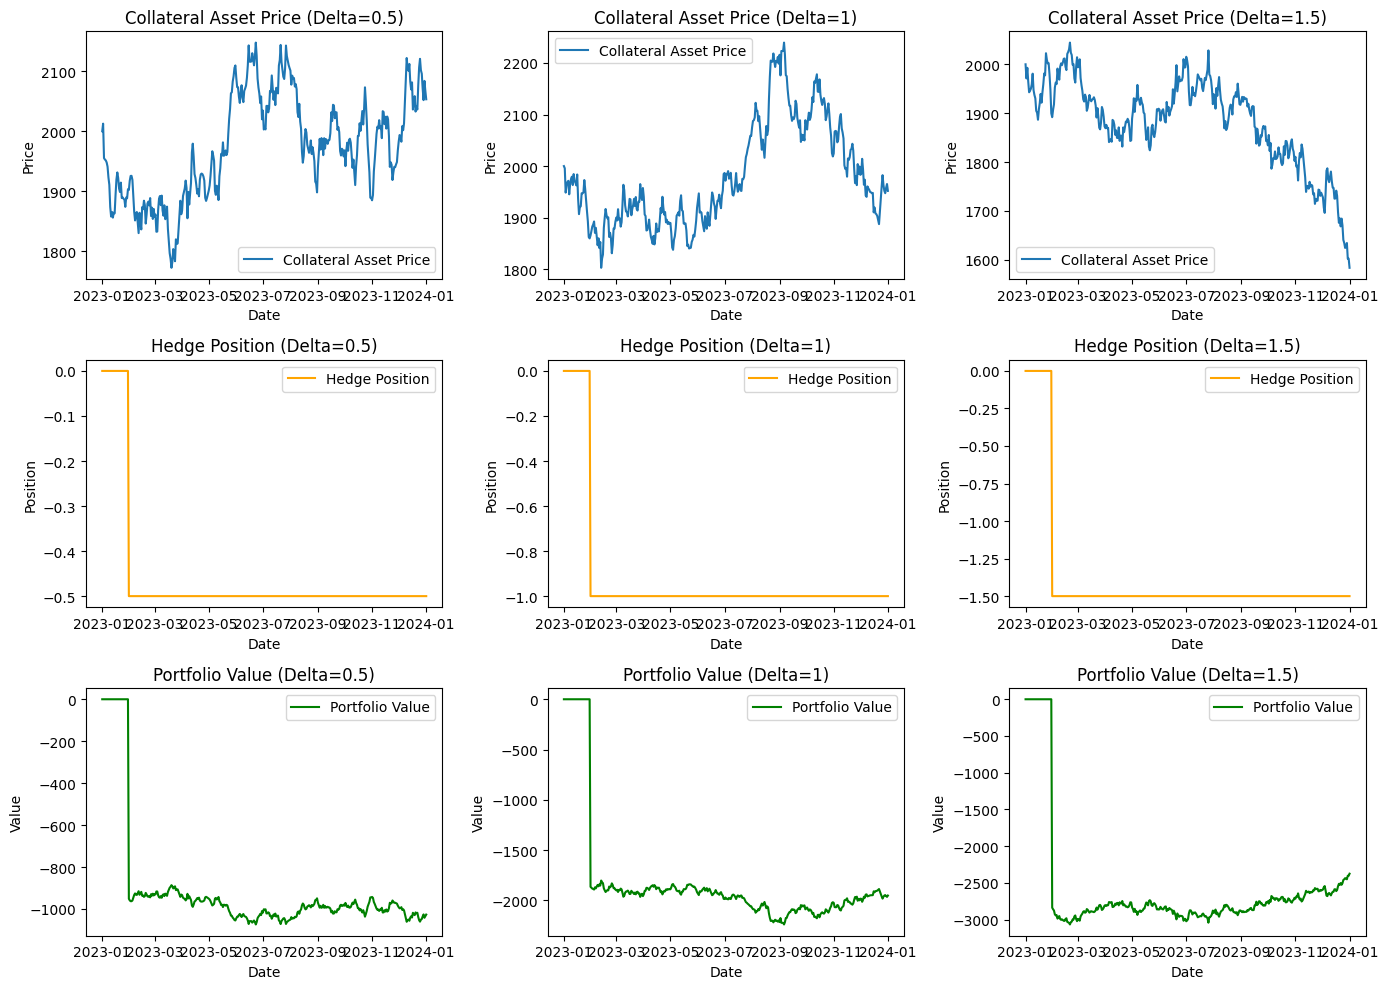

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 담보 자산의 가격 변동 데이터 생성
def generate_price_data(days, initial_price, volatility):
    prices = [initial_price]
    for _ in range(days):
        price_change = np.random.normal(0, volatility)
        new_price = prices[-1] * (1 + price_change)
        prices.append(new_price)
    return prices

# 델타 헷징 알고리즘 시뮬레이션
def delta_hedging_simulation(prices, adjustment_interval, max_loss_limit, delta_value):
    hedge_positions = [0]
    portfolio_values = [0]
    for i in range(1, len(prices)):
        if i % adjustment_interval == 0:
            delta = delta_value  # 변경된 델타 값 사용
            hedge_needed = -delta - hedge_positions[-1]
            hedge_positions.append(hedge_positions[-1] + hedge_needed)
        else:
            hedge_positions.append(hedge_positions[-1])
        portfolio_value = hedge_positions[-1] * prices[i]
        portfolio_values.append(portfolio_value)
    return hedge_positions, portfolio_values

# 시뮬레이션 파라미터 설정
days = 365
initial_price = 2000
volatility = 0.01
adjustment_interval = 30
max_loss_limit = 10000

# 다양한 델타 값으로 시뮬레이션 실행
delta_values = [0.5, 1, 1.5]  # 예시 델타 값들
results = {}

for delta_value in delta_values:
    prices = generate_price_data(days, initial_price, volatility)
    hedge_positions, portfolio_values = delta_hedging_simulation(prices, adjustment_interval, max_loss_limit, delta_value)
    results[delta_value] = (prices, hedge_positions, portfolio_values)

# 결과 시각화
dates = pd.date_range(start='2023-01-01', periods=days + 1)

plt.figure(figsize=(14, 10))

for delta_value in delta_values:
    prices, hedge_positions, portfolio_values = results[delta_value]

    # 담보 자산의 가격 그래프
    plt.subplot(3, len(delta_values), delta_values.index(delta_value) + 1)
    plt.plot(dates, prices, label='Collateral Asset Price')
    plt.title(f'Collateral Asset Price (Delta={delta_value})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # 헷징 포지션 그래프
    plt.subplot(3, len(delta_values), len(delta_values) + delta_values.index(delta_value) + 1)
    plt.plot(dates, hedge_positions, label='Hedge Position', color='orange')
    plt.title(f'Hedge Position (Delta={delta_value})')
    plt.xlabel('Date')
    plt.ylabel('Position')
    plt.legend()

    # 포트폴리오 가치 그래프
    plt.subplot(3, len(delta_values), 2 * len(delta_values) + delta_values.index(delta_value) + 1)
    plt.plot(dates, portfolio_values, label='Portfolio Value', color='green')
    plt.title(f'Portfolio Value (Delta={delta_value})')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()